In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [2]:
image_generator = ImageDataGenerator(rescale=1/255)

In [3]:
training_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="datasets/train/",
                                                   shuffle=True,
                                                   target_size=(224, 224),
                                                   subset="training",
                                                   class_mode="categorical")

validation_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="datasets/validation/",
                                                   shuffle=False,
                                                   target_size=(224, 224),
                                                   subset="training",
                                                   class_mode="categorical")

testing_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="datasets/test/",
                                                   shuffle=False,
                                                   target_size=(224, 224),
                                                   class_mode="categorical")

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


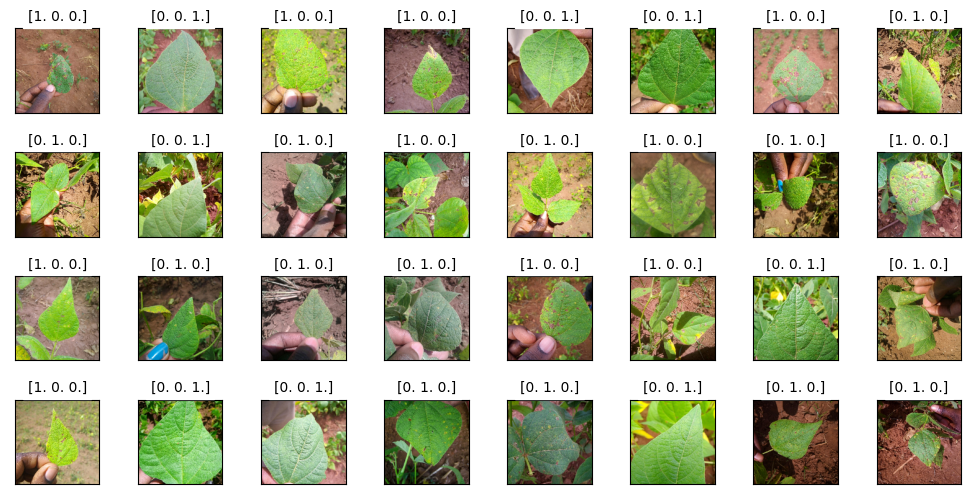

In [5]:
fig = plt.figure(figsize=(10, 10))

batch_1_img = training_set[0]
for i in range(32):
    digit = batch_1_img[0][i]
    label = batch_1_img[1][i]
    #digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digit, cmap=plt.cm.binary)
    ax.set_title(str(label), backgroundcolor='white', fontsize=10)
plt.tight_layout()

In [6]:
# model = keras.models.Sequential([keras.layers.Flatten(input_shape = [224, 224, 3]),                             
#                                  keras.layers.Dense(300, activation = 'relu' ),
#                                  keras.layers.Dense(100, activation = 'relu' ),
#                                  keras.layers.Dense(100, activation = 'relu' ),
#                                  keras.layers.Dense(100, activation = 'relu' ),
#                                  keras.layers.Dense(3, activation = 'softmax')])

In [9]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet_model.layers:
    layer.trainable = False
    
x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(inputs=resnet_model.input, outputs=predictions)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 300)               45158700  
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 3)                 303       
                                                                 
Total params: 45,209,303
Trainable params: 45,209,303
No

In [10]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# callback = keras.callbacks.EarlyStopping(monitor='val_loss',
#                                          patience=3,
#                                          restore_best_weights=True)

In [12]:
history = model.fit(training_set, epochs=20, validation_data=validation_set, verbose=1, callbacks=callback)

Epoch 1/20
33/33 [==============================] - 3s 88ms/step - loss: 1.0772 - accuracy: 0.4023 - val_loss: 1.0690 - val_accuracy: 0.3985
Epoch 2/20
33/33 [==============================] - 3s 83ms/step - loss: 1.0730 - accuracy: 0.4188 - val_loss: 1.0647 - val_accuracy: 0.4060
Epoch 3/20
33/33 [==============================] - 3s 82ms/step - loss: 1.0720 - accuracy: 0.4110 - val_loss: 1.0573 - val_accuracy: 0.3910
Epoch 4/20
33/33 [==============================] - 3s 81ms/step - loss: 1.0626 - accuracy: 0.4429 - val_loss: 1.0623 - val_accuracy: 0.4887
Epoch 5/20
33/33 [==============================] - 3s 85ms/step - loss: 1.0698 - accuracy: 0.4033 - val_loss: 1.0511 - val_accuracy: 0.4737
Epoch 6/20
33/33 [==============================] - 3s 83ms/step - loss: 1.0563 - accuracy: 0.4429 - val_loss: 1.0457 - val_accuracy: 0.4962
Epoch 7/20
33/33 [==============================] - 3s 84ms/step - loss: 1.0535 - accuracy: 0.4458 - val_loss: 1.0400 - val_accuracy: 0.5113
Epoch 8/20
33

In [20]:
history

,loss,accuracy,val_loss,val_accuracy
0,1.077191,0.402321,1.068962,0.398496
1,1.073001,0.418762,1.064726,0.406015
2,1.072003,0.411025,1.057330,0.390977
3,1.062634,0.442940,1.062346,0.488722
4,1.069820,0.403288,1.051144,0.473684
5,1.056335,0.442940,1.045717,0.496241
6,1.053502,0.445841,1.040012,0.511278
7,1.042692,0.449710,1.036652,0.624060
8,1.033555,0.474855,1.026846,0.548872
9,1.026357,0.471954,1.032888,0.436090


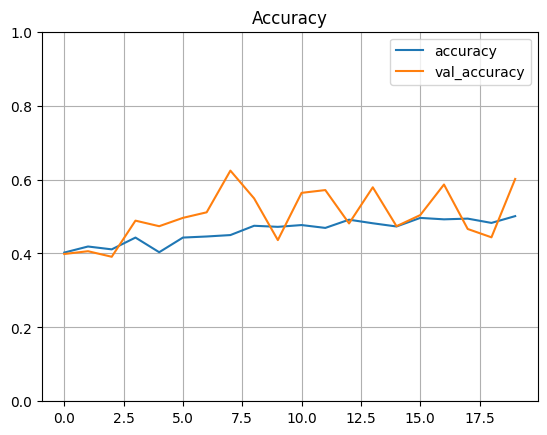

In [26]:
# history = pd.DataFrame(history.history)
plt.title("Accuracy")
plt.plot(history["accuracy"], label="accuracy")
plt.plot(history["val_accuracy"],  label="val_accuracy")
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
loss, accuracy = model.evaluate(training_set)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

33/33 [==============================] - 3s 83ms/step - loss: 0.5992 - accuracy: 0.7505
Loss:  0.599195659160614
Accuracy:  0.7504835724830627


In [15]:
loss, accuracy = model.evaluate(testing_set)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

4/4 [==============================] - 2s 467ms/step - loss: 0.6900 - accuracy: 0.6875
Loss:  0.6900425553321838
Accuracy:  0.6875
